# Mitochondrial DNA Analysis with Biopython

## Introduction

This notebook demonstrates basic sequence analysis using Biopython, focusing on the human mitochondrial DNA. Key tasks include:

- Loading and inspecting the mtDNA sequence.
- Calculating and visualizing GC content.
- Identifying the "ATG" start codon motif.
- Analyzing nucleotide composition.

These analyses provide foundational insights into the structure and function of the mitochondrial genome, relevant for genetics and pharmaceutical research.


In [2]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached biopython-1.84-cp312-cp312-win_amd64.whl.metadata (13 kB)
Using cached biopython-1.84-cp312-cp312-win_amd64.whl (2.8 MB)


In [9]:
from Bio import SeqIO


mito_file = r"C:/Users/polin/Downloads/human_mitochondrial.fasta"

In [10]:

# Load the mitochondrial DNA sequence.The loaded sequence is stored in the mito_record variable, which is a SeqRecord object. 
# This object contains various pieces of information about the sequence, including its ID, description, and the actual nucleotide sequence.
mito_record = SeqIO.read(mito_file, "fasta")

# Display basic information about the sequence
print(f"ID: {mito_record.id}")
print(f"Description: {mito_record.description}")
print(f"Length: {len(mito_record.seq)} bases")

# Example: Show a snippet of the sequence
print(f"Sequence Snippet: {mito_record.seq[:100]}...")


ID: NC_012920.1
Description: NC_012920.1 Homo sapiens mitochondrion, complete genome
Length: 16569 bases
Sequence Snippet: GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTG...


The description confirms that the sequence is the complete mitochondrial genome of Homo sapiens (humans). This means the sequence includes all the genes found in human mitochondria, which are responsible for energy production and other essential cellular functions.

Length: 16569 bases: The human mitochondrial genome is 16,569 bases long. This is typical for mitochondrial DNA, which is much smaller and simpler than the nuclear genome.

**Calculate the GC Content**

In [11]:

def calculate_gc_content(sequence):
    return 100 * float(sequence.count("G") + sequence.count("C")) / len(sequence)

# Calculate GC content
gc_content = calculate_gc_content(mito_record.seq)
print(f"GC Content: {gc_content:.2f}%")


GC Content: 44.36%


The GC content of 44.36% indicates that 44.36% of the nucleotide bases in the human mitochondrial DNA sequence are either guanine (G) or cytosine (C). This percentage is a key characteristic of DNA sequences and can influence the stability of the DNA helix, with higher GC content generally leading to more stable DNA due to the stronger triple hydrogen bonds between G and C compared to the double hydrogen bonds between adenine (A) and thymine (T). 

In the context of the human mitochondrial genome, this GC content reflects the specific composition and properties of the mitochondrial DNA, which is essential for its function in energy production and other cellular processes.

**Calculate motif occurrences**

In [12]:
# Finding the number of occurrences of a specific motif (e.g., 'ATG')
motif = "ATG"
motif_count = mito_record.seq.count(motif)
print(f"Number of occurrences of '{motif}' in the mitochondrial DNA: {motif_count}")


Number of occurrences of 'ATG' in the mitochondrial DNA: 162


The motif "ATG," which typically serves as the start codon in protein-coding genes, was found to occur 162 times in the human mitochondrial DNA sequence. This suggests that there are multiple potential sites within the mitochondrial genome where protein synthesis could be initiated. 

**GC content across genome**

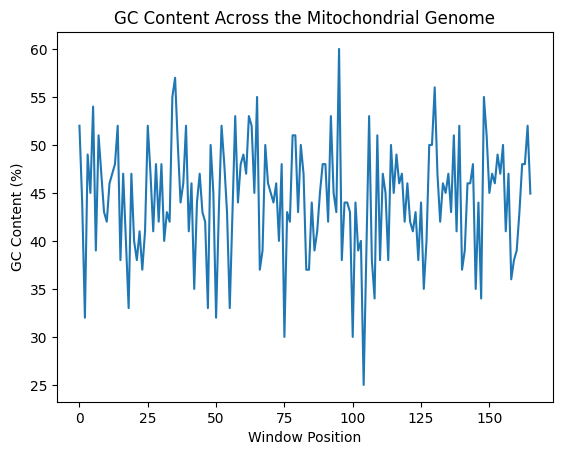

In [13]:
import matplotlib.pyplot as plt

# Plotting the GC content over sliding windows
window_size = 100 # means that each window is 100 bases long. This size determines how many nucleotides (A, T, G, C) are included in each segment when calculating the GC content.
gc_content_values = [calculate_gc_content(mito_record.seq[i:i+window_size]) for i in range(0, len(mito_record.seq), window_size)]

#The GC content is calculated for the first 100 bases, then the next 100 bases, moving along the sequence. 

plt.plot(gc_content_values)
plt.title("GC Content Across the Mitochondrial Genome")
plt.xlabel("Window Position")
plt.ylabel("GC Content (%)")
plt.show()


The plot shows the GC content variation across the human mitochondrial genome, calculated in sliding windows of 100 bases each. The GC content fluctuates between approximately 30% and 60%, indicating regions of the genome with different nucleotide compositions. These variations could reflect differences in the functional regions of the mitochondrial DNA, where certain segments might have higher or lower GC content due to the specific genes or regulatory elements they contain. 

For instance, regions with consistently higher GC content may correspond to coding sequences or other critical regions that require greater stability, as GC pairs are more thermodynamically stable than AT pairs. Conversely, regions with lower GC content may be non-coding or regulatory areas. 

**Nucleotide Counts**

In [19]:
from collections import Counter

# Count the frequency of each nucleotide
nucleotide_counts = Counter(mito_record.seq)
nucleotide_counts


Counter({'C': 5181, 'A': 5124, 'T': 4094, 'G': 2169, 'N': 1})

This distribution indicates a moderate AT-richness in the mitochondrial genome, which is common in many organisms. The relatively lower guanine content also aligns with the overall GC content of 44.36% that was previously calculated. The presence of a single 'N' is minimal and likely represents a sequencing error or uncertainty in the data. This nucleotide composition analysis provides foundational information about the mitochondrial genome, which is important for understanding its stability, gene expression, and functional regions.